# Metadata

```yaml
Course:   DS 5100
Module:   05 Numpy HW
Topic:    Capital Asset Pricing Model (CAPM)
Author:   R.C. Alvarado (revised)
Date:     7 July 2023
```

# Student Info

* Name:
* Net ID:
* URL of this file in GitHub:

# Instructions

In your **private course repo on Rivanna**, use this Jupyter notebook and the provided data file `capm_market_data.csv` to write code that performs the tasks below. 

Save your notebook in the `M05` directory.

Remember to add and commit these files to your repo. 

Then push your commits to your repo on GitHib.

Be sure to fill out the **Student Info** block above.

To submit your homework, save the notebook as a PDF and upload it to GradeScope, following the instructions.

**TOTAL POINTS: 10**

# Overview

<!-- In this exer Use NumPy and functions to 
* compute a stock's CAPM beta
* perform sensitivity analysis
* understand how the data points impact the beta estimate
 -->
 
In finance, a capital asset pricing model (CAPM) is a single-factor regression model used to explain and predict excess stock returns. 

There are better, more accurate models, but CAPM has its uses. 

For example, the **market beta** $\beta_i$ is a useful output.

Here is the formula for calculating the expected excess return:

$E[R_i] - R_f  = \beta_i ( E[R_m] - R_f )$

where:

* $E[R_i]$: expected return of stock $i$
* $R_f$: risk-free rate
* $\beta_i$: market beta of the stock
* $E[R_m] - R_f$: market risk premium

**Review the instructions below to complete the requested tasks.**

**TOTAL POINTS: 10**

# Setting Up

Import [NumPy](https://numpy.org/doc/stable/)

In [1]:
import numpy as np

Define Risk-free Treasury rate. You will use this constant below.

In [2]:
R_f = 0.0175 / 252

In [3]:
R_f

6.944444444444444e-05

# Prepare the Data

We import the data and convert it into usable Numby arrays.

**Read in the market data**

The values are closing prices, adjusted for splits and dividends.

The prefixes of the second two columns are based on the following codes:
* SPY is an ETF for the S&P 500 (i.e. the stock market as whole)
* AAPL stands for Apple  

In [4]:
data_file = "capm_market_data.csv"

In [5]:
data_2D = np.array([row.strip().split(',') for row in open(data_file, 'r').readlines()])

In [6]:
data_2D.shape

(136, 3)

In [7]:
# data_2D

**Separete columns from the data** 

In [8]:
COLS = np.str_(data_2D[0])

In [9]:
COLS

"['date' 'spy_adj_close' 'aapl_adj_close']"

**Separate columns by data types**

Numpy wants everything to in a data structure to be of the same type.

In [10]:
DATES = data_2D[1:, 0]

In [11]:
# DATES

In [12]:
RETURNS = data_2D[1:, 1:].astype('float')

In [13]:
# RETURNS

# Task 1 

(1 PT) 

Print the first 5 rows of the `RETURNS` table.

In [14]:
# PRINT ROWS

In [15]:
RETURNS[:5]

array([[321.55578613, 298.82995605],
       [319.12091064, 295.92471313],
       [320.33837891, 298.28271484],
       [319.43765259, 296.87988281],
       [321.1401062 , 301.6555481 ]])

# Task 2 

(1 PT) 

Print the first five values from the SPY column in `RETURNS`.

Then do the same for the AAPL column.

Use one cell for each operation.

In [16]:
# PRINT VALUES FOR SPY

In [56]:
# RETURNS

In [17]:
RETURNS[:5, 0]

array([321.55578613, 319.12091064, 320.33837891, 319.43765259,
       321.1401062 ])

In [18]:
# PRINT VALUES FOR AAPL

In [19]:
RETURNS[:5, 1]

array([298.82995605, 295.92471313, 298.28271484, 296.87988281,
       301.6555481 ])

# Task 3 

(1 PT)

Compute the excess returns by subtracting the constant `R_f` from `RETURNS`.

Save the result as numpy 2D array (i.e. a table) named `EXCESS`.

Print the LAST five rows from the new table.

In [20]:
# COMPUTE EXCESS

In [21]:
# RETURNS - R_f 

In [22]:
# RETURNS - (RETURNS * R_f)

In [23]:
EXCESS = RETURNS - R_f

In [24]:
# EXCESS = RETURNS - (RETURNS * R_f)

In [25]:
# PRINT ROWS

In [26]:
EXCESS[-5:]

array([[314.37993544, 383.00994032],
       [317.58992689, 383.67992323],
       [314.83992689, 381.90993422],
       [318.91994398, 388.22994154],
       [321.84993666, 390.89992445]])

# Task 4 

(1 PT)

Make a simple [scatterplot using Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) with SPY excess returns on the x-axis, AAPL excess returns on the y-axis.

Hint: Use the following code:

```python
from matplotlib.pyplot import scatter

scatter(<x>, <y>)
```
Replace `<x>` and `<y>` with the appropriate vectors.

You may want to save the vectors for the SPY and AAPL columns as `x` and `y` respectively. This will make it visually easier to perform Task 6.

In [27]:
# ENTER CODE

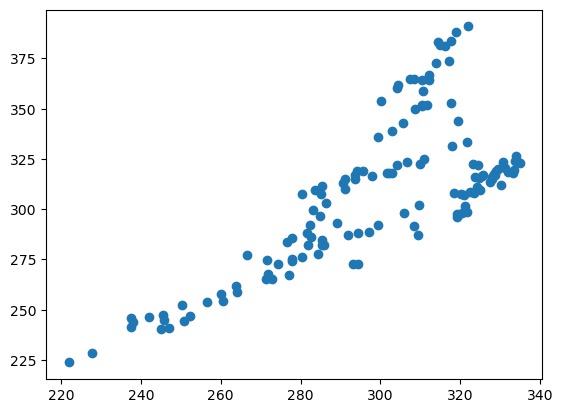

In [74]:
from matplotlib.pyplot import scatter

x = EXCESS[:, 0]
y = EXCESS[:, 1]

scatter(x, y);

# Taks 5 

(3 PTS)

Use the **normal equation**, listed below, to compute the Regression Coefficient Estimate of the data plotted above, $\hat\beta_i$.

Note that $x^T$ denotes the transpose of $x$.

$\begin{aligned} \hat\beta_i=(x^Tx)^{−1}x^Ty \end{aligned}$ 

Use the Numpy functions for matrix to do this &mdash; multiplication, transpose, and inverse. 

Note, however, that since $x$ in this case ~~a single column matrix, i.e.~~ a vector, the result of $x'x$ will be a scalar,\
which is not invertable. So you can just invert the result by division, i.e. 

$\hat\beta_i = \large\frac{1}{x^Tx} \small(x^Ty)$

Be sure to review what these operations do, and how they work, if you're a bit rusty.

**You should find that $\hat\beta_i > 1$.**

This means that the risk of AAPL stock, given the data, and according to this particular (flawed) model, is higher relative to the risk of the S&P 500.


In [29]:
# ENTER CODE

In [30]:
# This would work id x were a matrix, but it's a vector, so the result is a scalar, which can't be inverted

In [73]:
# RETURNS[:, 0]

In [70]:
# RETURNS[:,[0]] 

In [58]:
x.shape

(135,)

In [60]:
x1 = x.reshape(-1,1)

In [62]:
x1.shape

(135, 1)

In [63]:
beta = np.dot(np.linalg.inv(np.dot(x1.T, x1)), np.dot(x1.T, y))[0]

In [31]:
# This works in the case where x is a scalar
# beta = np.dot(1/(np.dot(x.T, x)), np.dot(x.T, y))

In [32]:
# So do this
beta = (1 / x.T.dot(x)) * (x.T.dot(y))

In [33]:
round(beta, 4)

1.03

In [34]:
# Another way

In [35]:
xm = x.reshape((-1,1))
beta2 = (np.linalg.inv(xm.T.dot(xm)) * x.T.dot(y))[0, 0]

In [36]:
round(beta2, 4)

1.03

# Task 6

(3 PTS)

**Measuring Beta Sensitivity to Dropping Observations (Jackknifing)**

Let's understand how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

Write a function called `beta_sensitivity()` with these specs:

- Take numpy arrays x and y as inputs.
- For each observation i, compute the beta without the current observation. You can use a `lambda` function for this.
- Return a list of tuples each containing the observation row dropped and the beta estimate, i.e. something like `(i, beta_est)`, depending how you've named your variables.

Hint: `np.delete(x, i)` will delete observation i from array x. 

Call `beta_sensitivity()` and print the first five tuples of output.

In [37]:
# ENTER FUNCTION

In [38]:
# CALL FUNCTION

In [39]:
# READ DATA

### Solution 1

In [40]:
get_beta = lambda x, y: (1 / x.T.dot(x)) * (x.T.dot(y))

In [41]:
get_beta(x, y)

1.029980294240815

In [42]:
# zip?

In [43]:
def beta_sensitivity(x, y):
    beta_data = []
    for i in range(len(x)):
        x_tmp = np.delete(x, i)
        y_tmp = np.delete(y, i)
        beta_data.append((i, get_beta(x_tmp, y_tmp)))
    return beta_data

In [44]:
# x.shape

In [45]:
beta_data = beta_sensitivity(x, y)

In [46]:
beta_data[:5]

[(0, 1.030847730172396),
 (1, 1.0308516176393125),
 (2, 1.0308255236222597),
 (3, 1.0308357542837523),
 (4, 1.030759501843587)]

### Solution 2

In [47]:
def beta_sensitivity2(X):
    beta_data = []
    for i in range(len(X)):
        X1 = np.delete(X, i, 0)
        beta_data.append((i, get_beta(X1[:, 0], X1[:, 1])))
    return beta_data

In [48]:
beta_data2 = beta_sensitivity2(EXCESS)

In [49]:
beta_data2[:5]

[(0, 1.030847730172396),
 (1, 1.0308516176393125),
 (2, 1.0308255236222599),
 (3, 1.0308357542837525),
 (4, 1.030759501843587)]

### Solution 3

In [50]:
get_beta3 = lambda X: (np.linalg.inv(X[:, :-1].T.dot(X[:, :-1]))) * (X[:, :-1].T.dot(X[:, -1]))
beta_sensitivity3 = lambda X: [(i, get_beta3(np.delete(X, i, 0))[0, 0]) for i in range(len(X))]

In [51]:
beta_data3 = beta_sensitivity3(EXCESS)

In [52]:
beta_data3[:5]

[(0, 1.030847730172396),
 (1, 1.0308516176393125),
 (2, 1.0308255236222599),
 (3, 1.0308357542837525),
 (4, 1.030759501843587)]